# Анализ успешности компьютерных игр

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными.   
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


## Изучение данных

In [1]:
import numpy as np 
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
data = pd.read_csv('C:/Users/Анастасия/Documents/Jupiter_project/projects/consolidation_project_1/games.csv') #открытие файла и просмотр информации о нем
data.info()
display(data.head())
print(data.columns)
pd.DataFrame(round((data.isna().mean() * 100), 2), columns=['NaNs,%']).style.format('{:.2f}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


,"NaNs,%"
Name,0.01
Platform,0.00
Year_of_Release,1.61
Genre,0.01
NA_sales,0.00
EU_sales,0.00
JP_sales,0.00
Other_sales,0.00
Critic_Score,51.32
User_Score,40.09


**Описание данных**  
`Name` — название игры  
`Platform` — платформа  
`Year_of_Release` — год выпуска  
`Genre` — жанр игры  
`NA_sales` — продажи в Северной Америке (миллионы проданных копий)  
`EU_sales` — продажи в Европе (миллионы проданных копий)  
`JP_sales` — продажи в Японии (миллионы проданных копий)  
`Other_sales` — продажи в других странах (миллионы проданных копий)  
`Critic_Score` — оценка критиков (максимум 100)  
`User_Score` — оценка пользователей (максимум 10)  
`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  

Данные за 2016 год могут быть неполными.

**Выявленные проблемы:**
Необходимо сменить типы данных в нескольких столбцах, привести к нижнему регистру названия столбцов. Необходимо провести проверку на дубликаты и обработать пропуски.

## Предобработка данных

In [3]:
data.columns = data.columns.str.lower() # приводим названия столбцов в нижний регистр
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
data.duplicated().sum() #проверяем полные дубликаты строк

0

### name

In [5]:
data['name'].describe() #распределение значений

count                           16713
unique                          11559
top       Need for Speed: Most Wanted
freq                               12
Name: name, dtype: object

In [6]:
data['name'].isna().sum() #проверяем пропуски

2

In [7]:
data[data['name'].isna()] #смотрим строки с пропусками

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В данном случае видим, что в этих строках в принципе пропущены все важные для нас значения, поэтому считаю, что их лучше всего удалить.

In [8]:
data.dropna(subset=['name'], inplace=True) #удаляем

На этапе describe обнаружили интересный момент - 12 раз встречается игра Need for Speed: Most Wanted. Проверим какие еще есть повторы и с чем они связаны.

In [9]:
data.query('name=="Need for Speed: Most Wanted"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Видим, что игра выходила на разных платформах, так что это нельзя считать дубликатом. Но есть и значения, где игра+платформа совпадает. Проверим все такие значения, для этого приведем названия к нижнему регистру, чтобы избежать и неявных дубликатов.

In [10]:
data['name'] = data['name'].str.lower()

In [11]:
data.loc[data.duplicated(subset=['name','platform'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,madden nfl 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
1190,need for speed: most wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,need for speed: most wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1745,sonic the hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,sonic the hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
5972,need for speed: most wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,need for speed: most wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
16230,madden nfl 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


Итак:
* Madden NFL 13 - дважды попала в таблицу на одной и той же платформе в одном и том же году, причем во второй раз продажи околонулевые, предполагаю, что это какое-то мелкое дополнение, в любом случае это не полноценная версия продукта, предлагаю - данные по продаж добавить к основной строке, а дубликат удалить.
* Sonic - во втором упоминании игры нет года релиза, возможно, тоже какое-то дополнение, но еще более вероятно, что это отдельная версия игры для "европейского рынка" тк продажи в певрой строке около 0, а во второй наобррот 0вые кроме Европы. Предлаагю также объединить значения этих строк.
* NFS - Игра 2012 года является перезапуском Need for Speed: Most Wanted 2005 года, так что эти строки оставляем на своих местах.

In [12]:
data.loc[604,'eu_sales'] = 0.23
data = data.drop(index=[16230])
data.loc[1745,'eu_sales'] = 0.54
data = data.drop(index=[4127])

In [13]:
data.reset_index(drop=True, inplace=True)

In [14]:
data.loc[data.duplicated(subset=['name','platform'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1189,need for speed: most wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1590,need for speed: most wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
5970,need for speed: most wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11713,need for speed: most wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T


###  platform

In [15]:
data['platform'].value_counts() #частота уникальных значений

PS2     2161
DS      2151
PS3     1329
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

Пропусков нет, тип данных ок, неявных дубликатов нет.

### year_of_release

In [16]:
data['year_of_release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     652
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: year_of_release, dtype: int64

In [17]:
data['year_of_release'].isna().sum() #кол-во пропусков

268

Видим, что в данном столбце в целом адекватные данные, похожие на правду. Есть пропуски, к сожалению. Пропусков как мы видели в начале менее 2%, заполнить доподлинно можно лишь по каждой игре отдельно прошерстив интернет. В данном случае считаю это слишком не оправданным, оставим пропуски как есть. И сменим тип данных на int тк дробных годов у нас нет.

In [18]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [19]:
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### genre

In [20]:
data['genre'].value_counts()

Action          3369
Sports          2347
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         887
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

Пропусков нет, тип данных ок, неявных дубликатов нет.

### na_sales, eu_sales, jp_sales, other_sales

In [21]:
data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].describe() #распредление значений в столбцах

,na_sales,eu_sales,jp_sales,other_sales
count,16711.000000,16711.000000,16711.000000,16711.000000
mean,0.263334,0.145063,0.077634,0.047348
std,0.813609,0.503390,0.308888,0.186752
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.080000,0.020000,0.000000,0.010000
75%,0.240000,0.110000,0.040000,0.030000
max,41.360000,28.960000,10.220000,10.570000


Пропусков нет, тип данных ок. Видно, что данные с сильными выбросами, и есть явные лидеры продаж, создадим столбец с суммарными продажами и проверим топ-10 игр по продажам, не ошибка ли это в данных.

In [22]:
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,super mario bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [23]:
data.pivot_table(index='name', values='all_sales', aggfunc='sum').sort_values(by='all_sales', ascending=False).head(10)

,all_sales
name,
wii sports,82.54
grand theft auto v,56.58
super mario bros.,45.31
tetris,35.84
mario kart wii,35.52
wii sports resort,32.77
pokemon red/pokemon blue,31.38
call of duty: black ops,30.82
call of duty: modern warfare 3,30.60


Непосредственно точной информации на 2016 год мне не удалось найти по продажам компьютерных игр, но судя даже по текущему состоянию такого рейтинга, информация правдива.

### critic_score

In [24]:
data['critic_score'].unique() #уникалные значения

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [25]:
data['critic_score'].isna().sum() #пропуски

8576

Да, увы половина значений здесь пропущена. Т.к. в дальнейшем в проекте планируется рассмотреть корреляцию отзывов и продаж, считаю плохой идеей заполнять пропуски чем-либо, это приведет к искажению полученных результатов. А вот тип данных поменять можем, тк нет дробных значений оценок.

In [26]:
data['critic_score'] = data['critic_score'].astype('Int64')
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,82.54
1,super mario bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,32.77
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38


### user_score

In [27]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [28]:
data['user_score'].isna().sum()

6699

По заполнению пропусков здесь остается такая же позиция. Видим, что помимо пропусков стречается значение `tbd`. To be announced (TBA), to be confirmed or continued (TBC), to be determined or decided or declared (TBD) и другие варианты - термины-заполнители, используемые очень широко в планировании событий, чтобы указать, что, хотя что-то запланировано или ожидается, что произойдет, конкретный аспект этого еще предстоит выяснить. 
Таким образом, это "заполнитель" для выгрузки, в целом для нашего исследования это равносильно тому, что данных нет, те просто nan. Поэтому заменим tbd на nan для использования в дальнейшем типа float.

In [29]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)
data['user_score'] = data['user_score'].astype('float')
data['user_score'].dtypes

dtype('float64')

### rating

In [30]:
data['rating'].value_counts()

E       3989
T       2961
M       1563
E10+    1419
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

In [31]:
data['rating'].isna().sum()

6764

Действующие рейтинги:

* «EC» («Early childhood») — «Для детей младшего возраста.

* «E» («Everyone») — «Для всех»

* «E10+» («Everyone 10 and older») — «Для всех старше 10 лет.

* «T» («Teen») — «Подросткам»

* «M» («Mature») — «От 17 лет»

* «AO» («Adults Only 18+») — «Только для взрослых»

* «RP» («Rating Pending»») — «Рейтинг ожидается»

K-A устравеший рейтинг, данные игры имеют рейтинг "E" согласно информации в интернете

In [32]:
data.query('rating=="K-A"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
656,theme hospital,PC,1997,Strategy,2.30,0.10,0.00,0.00,<NA>,9.0,K-A,2.40
902,parappa the rapper,PS,1996,Misc,0.26,0.16,1.46,0.03,92,7.4,K-A,1.91
16677,worms 2,PC,1997,Strategy,0.00,0.01,0.00,0.00,<NA>,8.1,K-A,0.01


In [33]:
data.loc[data['rating']=='K-A', 'rating'] = 'E'

В целом возрастной рейтинг в исследовании почти не участвует, поэтому пропуски предлагаю не трогать, тк адекватно массово заполнить их не получится. Но для анализа в пункте 4 предлагаю сменить пропуски на "NAN".

In [34]:
data['rating'] = data['rating'].fillna('NAN')

### Вывод

В результате предобработки:
* были приведены к нижнему регистру названия столбцов
* полных дубликатов не было, 2 игры были разбиты на 2 строки из-за дополнений, объединили их
* был изменен тип данных в столбцах `years_of_release`, `critic_score`, `user_score`
* значение `tbd` в столбце user_score земенено на `NaN`
* удалены 2 строки, в которых не содержалось значимой информации и восстановить ее было невозможно, остальные пропуски заполнять не стали, чтобы не повлиять на дальшеее исслеование
* рассчитаны суммарные продажи по всем регионам и создан столбец `all_sales`.

Большое количество пропусков в столбцах с оценками скорее всего объясняется просто их отсутвием. По многим играм отзывы не оставлялись и по всей видимости в связи с их непопулярностью.

## Исследовательский анализ

### Cколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [35]:
data_year = data.pivot_table(index = 'year_of_release', values='name', aggfunc='count'). reset_index() #сводная по играм-годам
data_year.rename(columns={'name': 'count'}, inplace=True)
data_year

,year_of_release,count
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


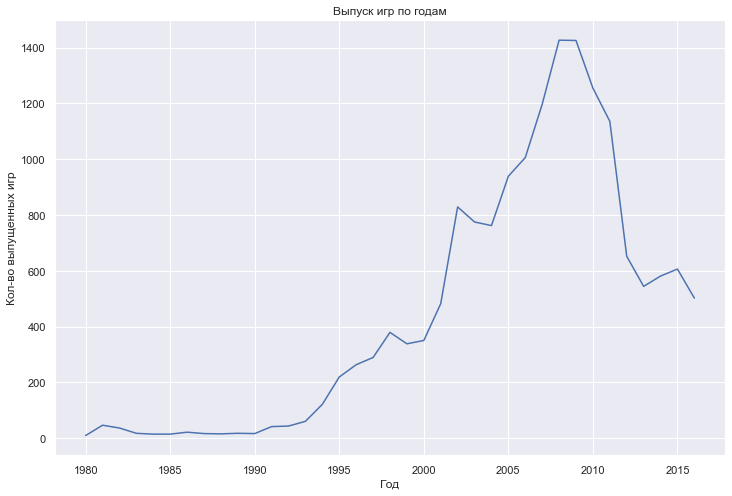

In [36]:
sns.set_theme(style="darkgrid") #график кол-ва игр в зависмости от года
plt.figure(figsize=(12, 8))
plt.title('Выпуск игр по годам')
plt.xlabel('Год')
plt.ylabel('Кол-во выпущенных игр')
sns.lineplot(x='year_of_release', y='count', data=data_year);

До начала 90х количество выпускаемых игр было достаточно маленьким, далее наблюдается постепенный рост и с 2000 года этот рост был очень стремительным, 2008-2009 год стали пиковыми, около 1430 выпущенных игр за каждый из них. И далее наблюдаем такое же стремительное падение, к 2015 году объем откатился к уровню 2001 года. Думаю, что данное падение обусловлено достаточно большим распространением мобильных игр, также не стоит забывать, что игры с каждым годом становятся все более ресурсозатратными для компаний, повышаются требования к графике итд, в итоге разработчики просто не могут "штамповать" игры пачками, а скорее концентрируются на создании штучных, но прибыльных и глобальных проектов.  Ну и еще, возможно, пиратство  тоже играет свою роль.
Таким образом, возвращаясь к изначальному вопросу, думаю, что можно сказать, что данные наиболее актуальны примерно с 2012 года, когда рынок "устаканился" и не испытывал резких спадов и скачков.

### Анализ игровых платформ

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [37]:
#распредление продаж по платформам с учетом первой выпущенной игры для данной платформы как дата ее выхода на рынок
data_platform = data.pivot_table(index='platform', 
                 values=['all_sales', 'year_of_release'],
                 aggfunc={'all_sales':sum, 'year_of_release':min}).sort_values(by='all_sales', ascending=False).reset_index()
data_platform.head()

,platform,all_sales,year_of_release
0,PS2,1255.77,2000
1,X360,971.42,2005
2,PS3,939.65,2006
3,Wii,907.51,2006
4,DS,806.12,1985


Возьмем для более подробного исследования топ-5 платформ и построим распределение их продаж по годам.

In [38]:
data_platform = data_platform.head(5)
top = data_platform['platform'].unique()
top

array(['PS2', 'X360', 'PS3', 'Wii', 'DS'], dtype=object)

In [39]:
top_platform = data.query('platform in @top')
top_sales = top_platform.pivot_table(index=['platform', 'year_of_release'], values='all_sales', aggfunc='sum').reset_index()
top_sales.head()

,platform,year_of_release,all_sales
0,DS,1985,0.02
1,DS,2004,17.27
2,DS,2005,130.14
3,DS,2006,119.81
4,DS,2007,146.94


In [40]:
def sell_line(data): #напишем функцию для построения графиков продаж по годам
    sns.set_theme(style="darkgrid")
    plt.figure(figsize=(14, 8))
    plt.xlabel('Год')
    plt.ylabel('Продажи в год')
    plt.title('Продажи игр на платформах по годам')
    sns.lineplot(data=data, x='year_of_release', y='all_sales', hue='platform', linewidth = 3, marker='o');

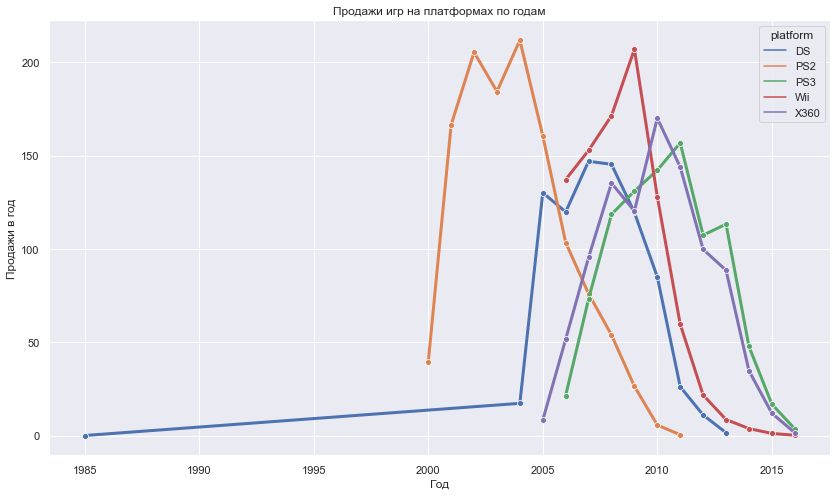

In [41]:
sell_line(top_sales)

Было бы еще интересно посмотреть на жизнь платформы в разрезе одного производителя - выбрала PS.

In [42]:
ps_sales = data.query('platform.str.contains("PS")')
ps_sales = ps_sales.pivot_table(index=['platform', 'year_of_release'], values='all_sales', aggfunc='sum').reset_index()
ps_sales.head()

,platform,year_of_release,all_sales
0,PS,1994,6.03
1,PS,1995,35.96
2,PS,1996,94.70
3,PS,1997,136.17
4,PS,1998,169.49


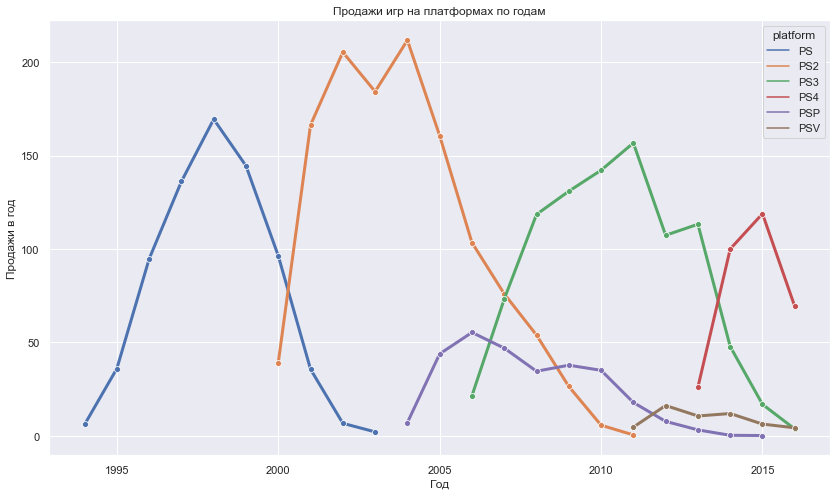

In [43]:
sell_line(ps_sales)

Итак, все построенные графики говорят о следующем(на графике семейства PS кстати видно более наглядно): 
* платформа после возникновения на рынке активно растет первые 2-3 года
* выходит на свой максимум на 3-5 год
* после 5 лет жизни начинается спад
* призводители платформ выпускают свои следующие версии примерно через 2 года после пика предыдущего, чтобы подготовить "почву"
* общий жизненный цикл платформы в среднем будет составлять 10 лет.

### Выбор актуального периода 

Исходя из количества выпускаемых игр и жизненного цикла платфоры предлагаю рассматривать в дальнейшем исследовании период 2012-2016 год. Как период в течение котрого были относительно стабильные показатели выпуска и  при этом период позволит включить в себя самые пиковые значения популярности консолей, вышедших даже 5 лет назад. Более ранние консоли будут, очевидно, уже находиться на спаде и не будут нам интересны с точки зрения вложения в них. 2016 год хоть и содержит не полные данные, но на имеющиеся можно опираться в дальнейших исследованиях.

In [44]:
data_research = data.loc[data['year_of_release'] >=2012].reset_index(drop=True)
data_research.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,grand theft auto v,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
1,grand theft auto v,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
2,call of duty: black ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NAN,14.63
3,pokemon x/pokemon y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,NAN,14.60
4,call of duty: black ops ii,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79


### Выбор актуальных платформ

Опять же, с учетом жизненного цикла каждой платформы имеет смысл включить в исследование не текущий топ-продаж, а скорее перспективные платформы, а значит наиболее молодые, посмотрим на самые свежие и их продажи.

In [45]:
young_platform = data.pivot_table(index='platform', 
                 values=['all_sales', 'year_of_release'],
                 aggfunc={'all_sales':sum, 'year_of_release':min}
                               ).sort_values(by='year_of_release', ascending=False).reset_index()
young_platform = young_platform.head(5)
young_platform

,platform,all_sales,year_of_release
0,XOne,159.32,2013
1,PS4,314.14,2013
2,WiiU,82.19,2012
3,3DS,259.00,2011
4,PSV,54.07,2011


Взяла первые 5 строк тк дальше уже платформа 2006 года, которая не будет нам интересна.

In [46]:
top_young = young_platform['platform'].unique()
top_young

array(['XOne', 'PS4', 'WiiU', '3DS', 'PSV'], dtype=object)

In [47]:
young_sales = data.query('platform in @top_young')
young_sales = young_sales.pivot_table(index=['platform', 'year_of_release'], values='all_sales', aggfunc='sum').reset_index()
young_sales.head()

,platform,year_of_release,all_sales
0,3DS,2011,63.20
1,3DS,2012,51.36
2,3DS,2013,56.57
3,3DS,2014,43.76
4,3DS,2015,27.78


2016 год придется все-таки не брать в расчет, тк данные по условию были не полные и не отражают прогноз достоверно.

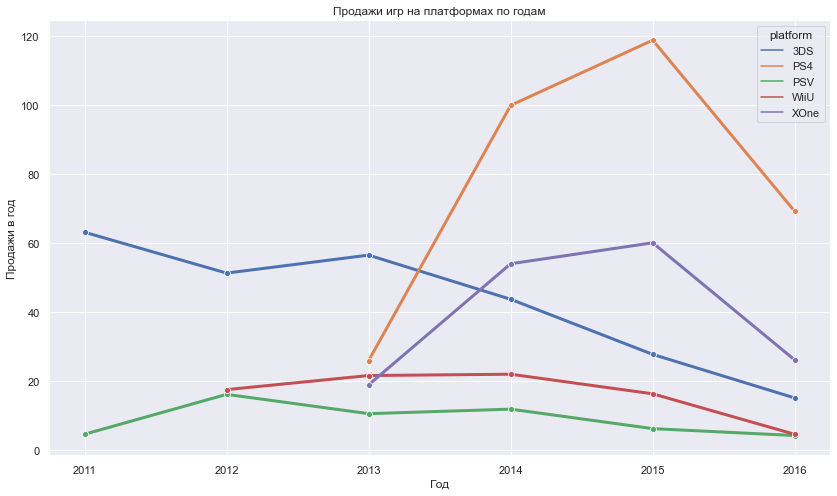

In [48]:
sell_line(young_sales)

А теперь посмотрим новые платформы vs старые топовые.

In [49]:
young_top = pd.concat([top_sales, young_sales]).reset_index(drop=True)
young_top = young_top.loc[(young_top['year_of_release']>=2012) & (young_top['year_of_release']<2016)]

In [50]:
def age(row): #функция для строки чтобы построить график по общему признаку
    if row['platform'] in ['XOne', 'PS4', 'WiiU', '3DS', 'PSV']:
        return 'young'
    else:
        return 'old'

In [51]:
young_top['age'] = young_top.apply(age, axis=1)
young_top.head()

,platform,year_of_release,all_sales,age
9,DS,2012,11.01,old
10,DS,2013,1.54,old
29,PS3,2012,107.36,old
30,PS3,2013,113.25,old
31,PS3,2014,47.76,old


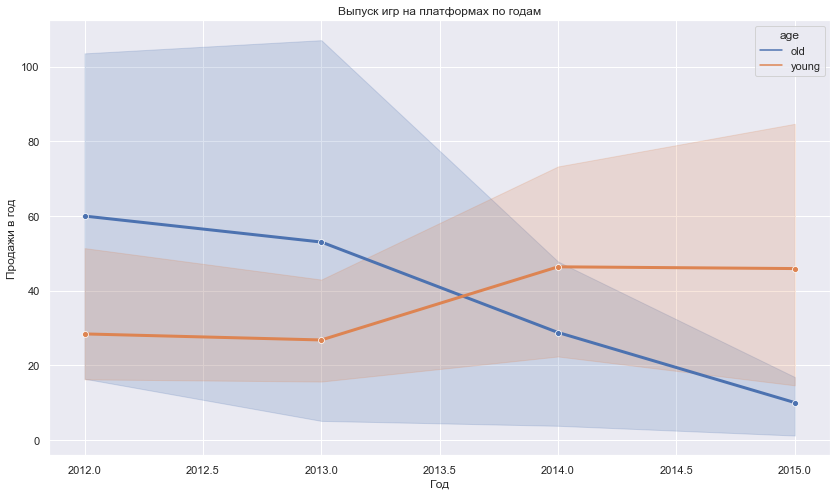

In [52]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(14, 8))
plt.xlabel('Год')
plt.ylabel('Продажи в год')
plt.title('Выпуск игр на платформах по годам')
sns.lineplot(data=young_top, x='year_of_release', y='all_sales', hue='age', linewidth = 3, marker='o');

Как видим, продажи по новым платформам уже начали опережать топовые в настоящем времени.  
Подробнее о них:
* PS4 и XOne демонстрируют наиболее выраженный рост и перспективность
* WiiU хоть и 2012 года выпуска, но кажется, что уже расти не будет и "не выстрелила" 
* 3DS(поративная ИС) тенденция к падению продаж, хотя они и достаточно высокие, на 2017 год можно расчитывать на нее точно, дальше по ситуации уже
* PSV(портативная ИС) тенденция к падению, менее выраженному, чем у 3DS, но продажи в целом все равно меньше, скорее всего 2017 также станет для нее последним, пока можно еще рассчитывать, но минимально вкладываться в рекламу.

Самая перспективная платформа с точки зрения прибыли - PS4, портативные ИС скоро выпадут с рынка.

Итак, в итоговой выборке будем рассматривать 5 самых поздних платформ и хотела бы еще включить в этот спиcок PC, продажи по ним меньше, но зато стабильные из года в год.

In [53]:
top_young_pc = top_young.tolist()
top_young_pc.append('PC')
top_young_pc

['XOne', 'PS4', 'WiiU', '3DS', 'PSV', 'PC']

In [54]:
data_research = data_research.query('platform in @top_young_pc')
data_research.info()                                   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1843 entries, 2 to 2884
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1843 non-null   object 
 1   platform         1843 non-null   object 
 2   year_of_release  1843 non-null   Int64  
 3   genre            1843 non-null   object 
 4   na_sales         1843 non-null   float64
 5   eu_sales         1843 non-null   float64
 6   jp_sales         1843 non-null   float64
 7   other_sales      1843 non-null   float64
 8   critic_score     920 non-null    Int64  
 9   user_score       989 non-null    float64
 10  rating           1843 non-null   object 
 11  all_sales        1843 non-null   float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 190.8+ KB


### Распределение глобальных продаж игр в разбивке по платформам

Построим "ящики с усами" и опишем полученный результат.

Text(0.5, 1.0, 'Продажи по платформам за год')

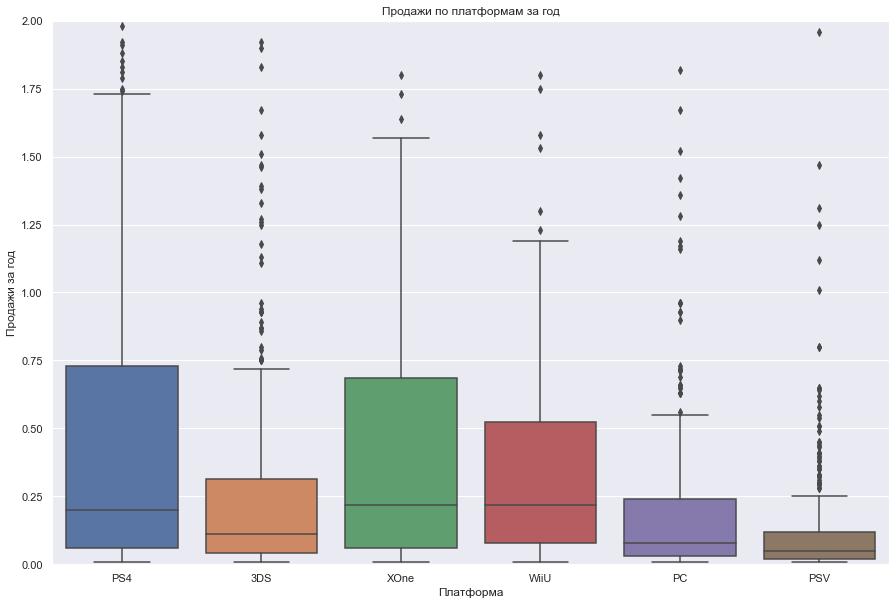

In [55]:
plt.figure(figsize=(15, 10)) #строим боксплоты для каждой платформы по выручке
sns.boxplot(data=data_research, x="platform", y="all_sales")
plt.ylim(0,2)
plt.xlabel('Платформа')
plt.ylabel('Продажи за год')
plt.title('Продажи по платформам за год')

Из распределения продаж игр по годам по каждой платформе видно, что есть очень большое количество выбросов по каждому ящику, те по сути это означает, что прогнозирование продаж будет достаточно затруднено, при этом средние значения будут далеки от медиан, также очевидна большая дисперсия и стандарнтное отклонение у данных распределений. В целом же медианные значения продаж у платформ не являющимися портативными ИС достаточно близки и примерно равны 0,2-0,25 млн штук в год. При этом сравнивать успешность платформ на основе медиан в данном случае не очень корректно, тк здесь с точки зрения бизнеса нас больше инетресуют средние значения, а не медианные. Буквально несколько успешных игр могут кардинально изменить ситуацию на рынке.

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

Для рассмотрения корреляции возьмем PS4 как самую перспективную и актуальную за все время и построим диаграмму рассеяния.

In [56]:
data_ps4 = data.query('platform=="PS4"')

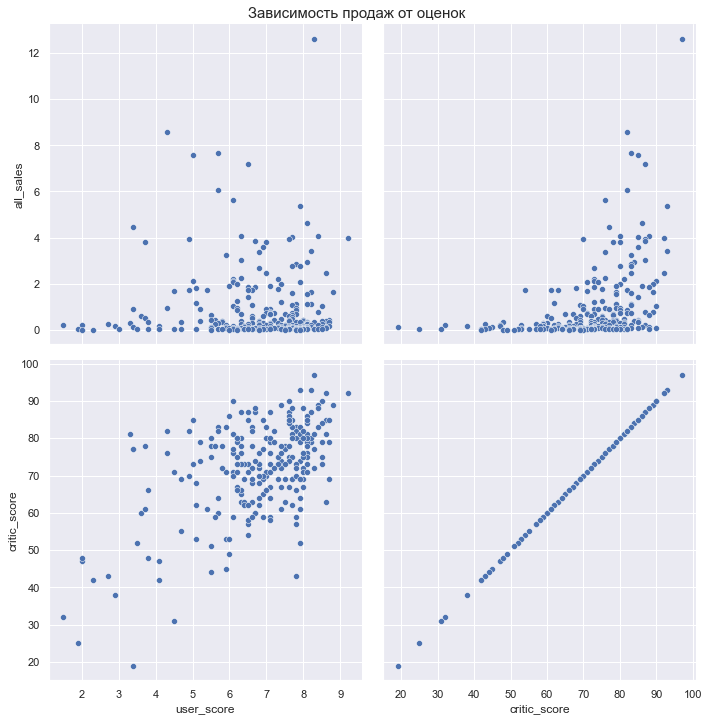

In [57]:
g = sns.PairGrid(data=data_ps4, 
                 x_vars=['user_score', 'critic_score'],
                 y_vars=['all_sales', 'critic_score'],
                 height=5)

g.map(sns.scatterplot);
g.fig.suptitle('Зависимость продаж от оценок',
               y = 1,
               fontsize = 15);

Для платформ из перспективного топа не будем для каждой строить диаграмму, но посмотрим на коэффициенты корреляции.

In [58]:
for platform in top_young:
    data_platform = data[data['platform']==platform]   
    print(f'Корреляция оценки критиков и игроков с продажами на платформе {platform}', end='\n')
    display(round(data_platform[['all_sales', 'critic_score', 'user_score']].corr(), 2))

Корреляция оценки критиков и игроков с продажами на платформе XOne


,all_sales,critic_score,user_score
all_sales,1.00,0.42,-0.07
critic_score,0.42,1.00,0.47
user_score,-0.07,0.47,1.00


Корреляция оценки критиков и игроков с продажами на платформе PS4


,all_sales,critic_score,user_score
all_sales,1.00,0.41,-0.03
critic_score,0.41,1.00,0.56
user_score,-0.03,0.56,1.00


Корреляция оценки критиков и игроков с продажами на платформе WiiU


,all_sales,critic_score,user_score
all_sales,1.00,0.35,0.40
critic_score,0.35,1.00,0.77
user_score,0.40,0.77,1.00


Корреляция оценки критиков и игроков с продажами на платформе 3DS


,all_sales,critic_score,user_score
all_sales,1.00,0.35,0.22
critic_score,0.35,1.00,0.74
user_score,0.22,0.74,1.00


Корреляция оценки критиков и игроков с продажами на платформе PSV


,all_sales,critic_score,user_score
all_sales,1.00,0.13,0.01
critic_score,0.13,1.00,0.73
user_score,0.01,0.73,1.00


In [59]:
print(f'Корреляция оценки критиков и игроков с продажами общая ', end='\n')
display(round(data_research[['all_sales', 'critic_score', 'user_score']].corr(), 2))

Корреляция оценки критиков и игроков с продажами общая 


,all_sales,critic_score,user_score
all_sales,1.00,0.31,0.02
critic_score,0.31,1.00,0.50
user_score,0.02,0.50,1.00


Исходя из полученной диаграммы и таблиц по корреляции можно сделать следущие выводы:
* между оценками критиков и продажами игр существует положительная линейная корреляция, хотя по общим стандартам ее выраженность можно считать слабой, наиболее выраженная на платформе PS4 и XOne - 0,41-0,42, наименьшая на платформе PSV - 0,13
* между оценками пользователей и продажами игр почти всех платформах в целом одинаковая очень слабая корреляция, ее буквально нет, причем зачастую она даже отрицательная
* при этом на платформе WiiU корреляция с оценками пользователей даже выше, чем критиков, что не типично в общей картине, могу предположить, что это происходит из-за совпадения по данной платфрме оценки пользовтаелей и критиков
* чем выше отзывы критиков, тем как правило, больше продажи

### Общее распределение игр по жанрам

Создадим сводную таблицу для каждого жанра, в котрой посчитаем суммарные продажи по жанру, общее количество выпущенных игр и среднее значение прибыли на 1 выпущенную игру соотвествующего жанра.

In [60]:
data_genre = data_research.pivot_table(index='genre', values='all_sales', aggfunc=['count','sum','mean']).reset_index()
data_genre.columns=['genre', 'count', 'sum','mean']
data_genre['mean'] = round(data_genre['mean'], 2)
data_genre. sort_values(by='mean', ascending=True)

,genre,count,sum,mean
1,Adventure,187,18.15,0.10
11,Strategy,56,9.89,0.18
5,Puzzle,22,4.09,0.19
3,Misc,129,42.58,0.33
0,Action,660,227.44,0.34
6,Racing,72,33.52,0.47
2,Fighting,56,28.16,0.50
9,Simulation,57,31.32,0.55
7,Role-Playing,262,147.43,0.56
10,Sports,142,96.21,0.68


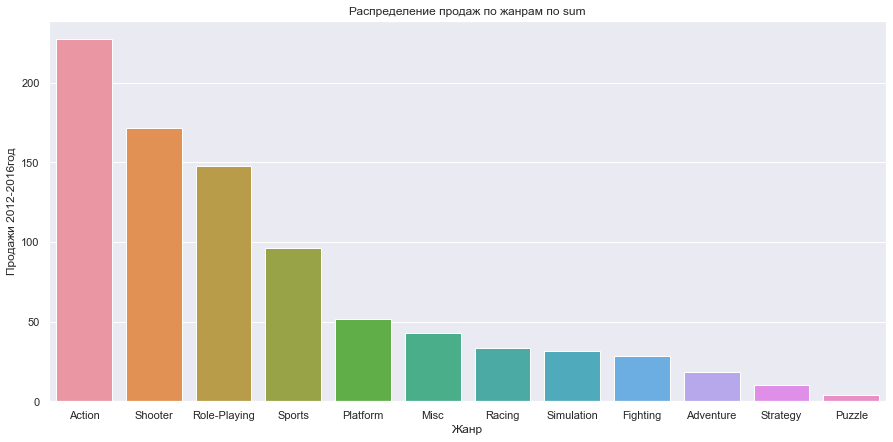

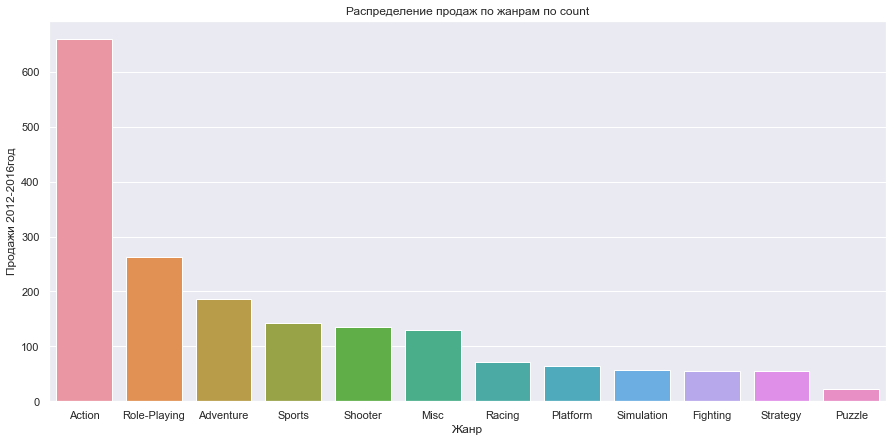

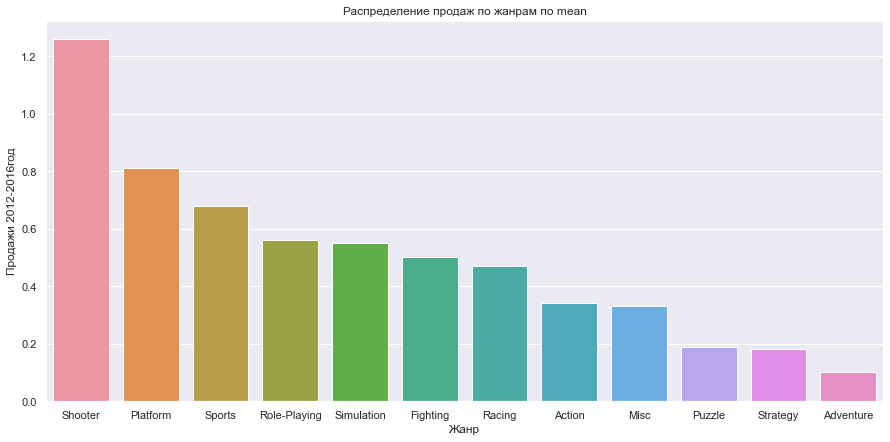

In [61]:
for column in ['sum', 'count', 'mean']:  #строим графики для каждого из показателей
    data_genre = data_genre.sort_values(by=column, ascending=False)
    plt.figure(figsize=(15, 7))
    bar = sns.barplot(data=data_genre, x='genre', y=column);
    plt.xlabel('Жанр')
    plt.ylabel('Продажи 2012-2016год')
    plt.title(f'Распределение продаж по жанрам по {column}');

Итого:
* Самая популярная и принесшая максимальные продажи категория это экшн, далее идут шутеры и ролевые. Самая остающая - пазлы.
* По количеству выпускаемых игр лидирует также экшн, далее идут ролевые и приключения. Наименее выпускаемые - снова пазлы.
* По средней величине продаж лидируют шутеры, платформеры и спорт. Рейтинг в средних виличинах в значительной мере отличается от общего, те условно берут "качеством", а не количеством. Скорее всего в указанном промежутке времени выходили какие-то "знаковые" игры соотвествующих жанров.
* При всем при этом сложно сказать что именно с прибыльностью каждого из жанров. Ведь очевидно, что и затраты на создание шутеров и экшенов, намного выше, чем пазлов.

### Вывод

Самый расцвет продаж игр пришелся на 2008-2009 год и стех пор они постепенно падают. Игровые платформы в среднем живут по 10 лет, характеризуются резким взлетом продаж в первые 3 года жизни, пиками на 4-5 году жизни, и дальнейшим падением, производители линеек консолей учитывают это при выпуске следующего поколения.  
Есть 3 потенциально прибыльные платформы для кампаний на 2017 год. PS4 и XOne - их возраст и динамика роста говорит о том, что продажи игр по ним будут расти в 2017 году. 3DS - не смотря на тренд на снижение, продажи у нее были соизмеримы с XOne, так что ее можно также рассматривать как потенциально прибыльную в 2017.  
На платформах PS4 и XOne и РС высокие отзывы критиков положительно коррелируют с продажами. Возможно, производителям есть смысл спонсировать отзывы критиков и продвигать игры в первую очередь среди них для увеличения продаж.
Правда корреляция все равно не высокая- хорошие отзывы не гарантируют высокие продажи.  
Самый прибыльный жанр - шутеры. Самый неприбыльный - пазлы. Экшен игры берут объемами скорее, а высокую прибыль генерируют единичные игры.

## Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

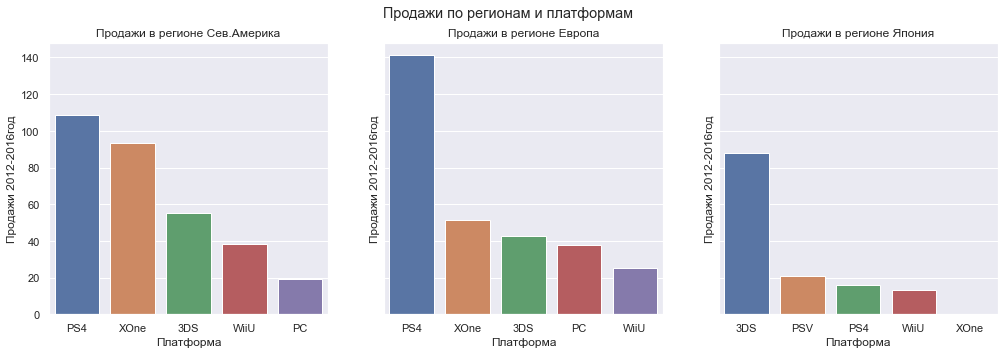

In [62]:
index = {'na_sales':0, 'eu_sales':1, 'jp_sales':2}
title = {'na_sales':'Сев.Америка', 'eu_sales':'Европа', 'jp_sales':'Япония'}
fig, axes = plt.subplots(1, 3, figsize=(17, 5), sharey=True)
fig.suptitle('Продажи по регионам и платформам')
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    top5_platform = data_research.pivot_table(index='platform', 
                                              values=region, 
                                              aggfunc='sum').sort_values(by=region, ascending=False).reset_index().head()
    sns.barplot(ax=axes[index[region]], data=top5_platform, x='platform', y=region);
    axes[index[region]].set_title(f'Продажи в регионе {title[region]}')
    axes[index[region]].set_ylabel('Продажи 2012-2016год')
    axes[index[region]].set_xlabel('Платформа')

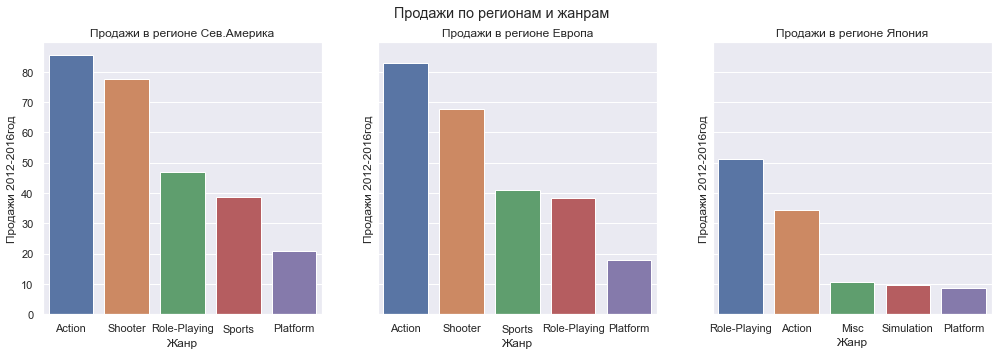

In [63]:
index = {'na_sales':0, 'eu_sales':1, 'jp_sales':2}
title = {'na_sales':'Сев.Америка', 'eu_sales':'Европа', 'jp_sales':'Япония'}
fig, axes = plt.subplots(1, 3, figsize=(17, 5), sharey=True)
fig.suptitle('Продажи по регионам и жанрам')
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    top5_platform = data_research.pivot_table(index='genre', 
                                              values=region, 
                                              aggfunc='sum').sort_values(by=region, ascending=False).reset_index().head()
    sns.barplot(ax=axes[index[region]], data=top5_platform, x='genre', y=region);
    axes[index[region]].set_title(f'Продажи в регионе {title[region]}')
    axes[index[region]].set_ylabel('Продажи 2012-2016год')
    axes[index[region]].set_xlabel('Жанр')

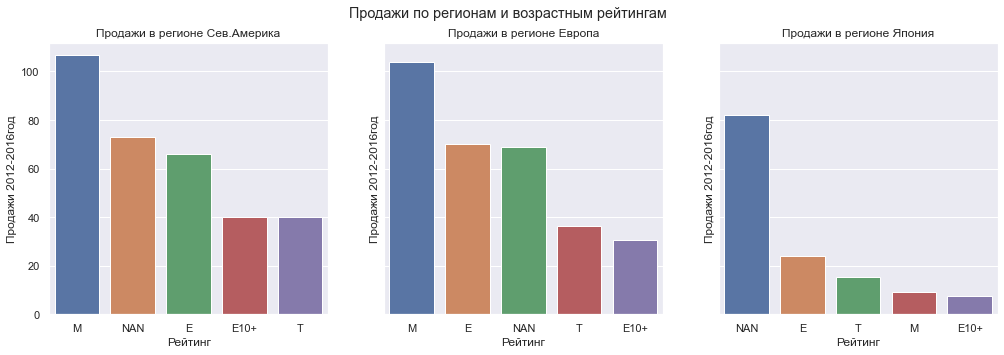

In [64]:
index = {'na_sales':0, 'eu_sales':1, 'jp_sales':2}
title = {'na_sales':'Сев.Америка', 'eu_sales':'Европа', 'jp_sales':'Япония'}
fig, axes = plt.subplots(1, 3, figsize=(17, 5), sharey=True)
fig.suptitle('Продажи по регионам и возрастным рейтингам')
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    top5_platform = data_research.pivot_table(index='rating', 
                                              values=region, 
                                              aggfunc='sum').sort_values(by=region, ascending=False).reset_index().head()
    sns.barplot(ax=axes[index[region]], data=top5_platform, x='rating', y=region);
    axes[index[region]].set_title(f'Продажи в регионе {title[region]}')
    axes[index[region]].set_ylabel('Продажи 2012-2016год')
    axes[index[region]].set_xlabel('Рейтинг')

Действующие рейтинги:  
«EC» («Early childhood») — «Для детей младшего возраста  
«E» («Everyone») — «Для всех»  
«E10+» («Everyone 10 and older») — «Для всех старше 10 лет.  
«T» («Teen») — «Подросткам»  
«M» («Mature») — «От 17 лет»  
«AO» («Adults Only 18+») — «Только для взрослых»  
«RP» («Rating Pending»») — «Рейтинг ожидается»  

**Итого по платформам:**
* Европа и Америка в целом очень похожи, самая популярная - PS4 
* вот только в Америке XOne в принципе может конкурировать с PS4, а в Европе отрыв слишком большой
* ну и на ПК в Европе играют больше почти в два раза
* Япония очень сильно отличается, в целом в ней продаж меньше
* самая популярная платформа в Японии 3DS(!), портативная, и на втором месте тоже портаиивная консоль PSV
* XOne и ПК в Японии в принципе не котируются

**Итого по жанрам:**
* Здесь Америка и Европа тоже крайне схожи, самы популяный жанр - экшн, с небольши отставанием шутеры
* В Европе чуть больше любят спортивные игры, чем ролевые
* Япония снова особняком, ролевые игры в топе
* в Японии в топ вообще не попали шутеры и спортивные игры
    

**Итого по возрастному рейтингу:**

* Европа и Америка по-прежнему вместе, лидируют игры с рейтингом от 17 лет 
* в Европе чуть более популярны игры для подростков, чем для категории 10+
* в Японии лидируют игры в категории "для всех" и "подросткам"
* относительно Японии это может говорить не совсем о возрасте игроков, а скорее сочетается с жанрами, которые они предпочитают, логично было бы предположить, что экшен и шутеры могут иметь более серьезные возрастные ограничения, чем ролевые
* в рейтингах было достаточно много пропусков и поэтому в каждом из регионов в топ попали игры с "заполнителем"
* особенно большую долю они составляют в Японии
* в разных странах представлены разные рейтинговые модели: американская ESRB, европейская PEGI, японская CERO. Так что пропуски не удивительны, для корректного анализа возрастной аудитории потребовалось бы восстанавливать рейтинг все же

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сначала проверим распределение на нормальность для определения статичтического критерия.

In [65]:
data_pc = data_research.query('platform=="PC" and user_score>=0') #выборка по PC

In [66]:
data_xo = data_research.query('platform=="XOne" and user_score>=0') #выборка по XOne

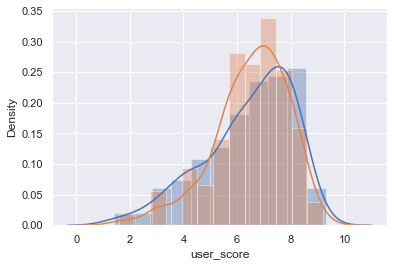

In [67]:
sns.distplot(data_pc['user_score']); #график и кривая распределения
sns.distplot(data_xo['user_score']);

In [68]:
st.shapiro(data_pc['user_score']) #Тест Шапиро–Уилка на нормальность распределения

ShapiroResult(statistic=0.9382862448692322, pvalue=1.141219598821408e-07)

In [69]:
st.shapiro(data_xo['user_score'])

ShapiroResult(statistic=0.955055296421051, pvalue=1.5248597264871933e-05)

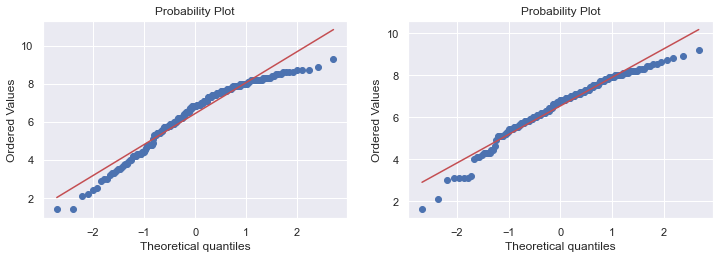

In [70]:
plt.figure(figsize=(12,8)) #построение qqplot-а
plt.subplot(2,2,1)
st.probplot(data_pc['user_score'], dist="norm", plot=plt)
plt.subplot(2,2,2)
st.probplot(data_xo['user_score'], dist="norm", plot=plt)
plt.show()

По всем показателям наши распредления далеко не нормальные, поэтому далее гипотезы будем проверять непараметрическим тестом Манна-Уитни.

<p>Введем основную и альтернативные гипотезы:</p>

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Средние пользовательские рейтинги платформ Xbox One и PC одинаковые}\\
   H_1 :\text{Средние пользовательские рейтинги платформ Xbox One и PC отличаются}
 \end{cases}
\end{equation*}$

Уровень значимости: $\alpha = 0.05$

Посчитаем p-value, используя mannwhitneyu из библиотеки scipy для сравнения средних двух выборок.

Если p-value будет меньше выбранного уровня значимости $\alpha = 0.05$, то нулевую гипотезу о равенстве средних отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

In [71]:
alpha = .05
results = st.mannwhitneyu(data_pc['user_score'], data_xo['user_score'], alternative='two-sided')
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.8649062974699414
Не получилось отвергнуть нулевую гипотезу


Следовательно средние пользовательсике рейтинги не различаются статистически значимо.

In [72]:
print('Средний пользовательский рейтинг платформы PC равен', data_pc['user_score'].mean())
print('Средний пользовательский рейтинг платформы Xbox One равен', data_xo['user_score'].mean())

Средний пользовательский рейтинг платформы PC равен 6.428640776699027
Средний пользовательский рейтинг платформы Xbox One равен 6.52142857142857


Действительно, отличаются "на глаз" не сильно.

### Средние пользовательские рейтинги жанров Action и Sports разные

Аналогично проверяем на нормальность, не буду проверять "по полной" тк это распределение все той же величины, просто по другому параметру.

In [73]:
data_action = data_research.query('genre=="Action" and user_score>=0')
data_sports = data_research.query('genre=="Sports" and user_score>=0')

In [74]:
st.shapiro(data_action['user_score'])

ShapiroResult(statistic=0.9032853841781616, pvalue=7.601322457757853e-14)

In [75]:
st.shapiro(data_sports['user_score'])

ShapiroResult(statistic=0.9613256454467773, pvalue=0.0025281470734626055)

Распределение не нормальное, гипотезы также будем проверять непараметрическим тестом Манна-Уитни.

<p>Введем основную и альтернативные гипотезы:</p>

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Средние пользовательские рейтинги жанров Action и Sports одинаковые}\\
   H_1 :\text{Средние пользовательские рейтинги жанров Action и Sports отличаются}
 \end{cases}
\end{equation*}$

Уровень значимости: $\alpha = 0.05$

Посчитаем p-value, используя mannwhitneyu из библиотеки scipy для сравнения средних двух выборок.

Если p-value будет меньше выбранного уровня значимости $\alpha = 0.05$, то нулевую гипотезу о равенстве средних отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

In [76]:
alpha = .05
results = st.mannwhitneyu(data_action['user_score'], data_sports['user_score'], alternative='two-sided')
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  3.351190004799919e-14
Отвергаем нулевую гипотезу


In [77]:
print('Средний пользовательский рейтинг игр жанра Action равен', data_action['user_score'].mean())
print('Средний пользовательский рейтинг игр жанра Sports равен', data_sports['user_score'].mean())

Средний пользовательский рейтинг игр жанра Action равен 6.887537091988133
Средний пользовательский рейтинг игр жанра Sports равен 5.65892857142857


Получили очень маленькое p-значение при тестировании нулевой гипотезы - очень маленькая вероятность получить такое значение случайно, а значит нулевую гипотезу отвергаем. Средние пользовательские рейтинги жанров Action и Sports различаются статистически значимо.

В целом, стат тесты и выдвижение гипотез здесь не совсем уместно тк, судя по данным, мы имеем дело не с выборкой, а с генеральной совокупностью и можем сравнивать истинные средние напрямую.

## Вывод

В ходе проекта были проанализированы данные по продажам компьютерных игр с 1980 по 2016 год(данные за 2016 год были неполные) 

Была проведена предобработка данных, изменены типы данных в столбцах, где это требовалось. Имеющиеся пропуски скорее всего были обусловлены отсутвием информации об оценках многих игр, чтобы не повлиять на исследование пропуски не заполнялись.

Для целей исследования были добавлены рассчетные данные:

* суммарные продажи по всем регионам


В ходе исследования были проанализированы продажи игр по годам - в данный момент игровая индустрия испытывает не лучшие времена, пиком продаж стал 2010 год. Более детально в работе рассматривался период 2012-2016 год, в связи с тем что именно в этом периоде продажи были относительно стабильны и данный временной интервал(5 лет) соотвествует периоду, необходимому для реализовывания потенциала новой платформы. Жизненный цикл игровых платформ составляет в среднем 10 лет - от выхода на рынок к выходу с него. На момент 2016 года были выделены 5 популярных развивающихся платформ  - XOne, PS4, WiiU, 3DS, PSV. Последние 2 из них являются портативными и не могут конкурировать с полноценными, но тем не менее их нельзя списывать со счетов и в рекламный бюджет стоит включать и их тоже. PS4 и XOne безусловные лидеры, в которые однозначно нужно вкладываться.

Было рассмотрено распределение продаж по платформам: по каждой из них наблюдается большое количество выбросов, из чего можно сделать вывод, что сравнивать успешность платформ на основе медиан  не  корректно, буквально несколько успешных игр могут кардинально изменить ситуацию на рынке.

Была посчитана корреляция между продажами и отзывами критиков и  пользвоателей. Между оценками критиков и продажами игр существует линейная корреляция, хотя по общим стандартам ее выраженность можно считать слабой, наиболее выраженная на платформе PS3 - 0,43, наименьшая на платформе Wii - 0,17. Между оценками пользователей и продажами игр на всех платформах в целом одинаковая очень слабая корреляция, ее буквально нет. Чем выше отзывы критиков, тем как правило, больше продажи.

В процессе анализа были рассмотрены продажи игр в разрезе жанров. Самая популярная и принесшая максимальные продажи категория это экшн, далее идут шутеры и ролевые. Самая остающая - пазлы. По количеству выпускаемых игр лидирует также экшн, далее идут ролевые и приключения. По средней величине продаж лидируют шутеры, платформеры и спорт. Рейтинг в средних виличинах в значительной мере отличается от общего, те условно берут "качеством", а не количеством. Если отвечать на вопрос в какие игры глобально имеет смысл вкладываться, то в первую очередь это шутеры и экшн.

В работе был составлен условный портрет среднего пользователя из каждого региона. Европейский и американский пользовтаель оказались достаточно схожи в пердпочтениях. Они играют на PS4 или XOne в игры жанра экшен или шутер с рейтингом от 17 лет. Японский рынок сильно отличается от остальных, по продажам он меньше, там популярны поративные ИС 3DS и PSV, предпочитают ролевые игры, а система рейтинга в данных играх скорее всего японская и поэтому полноценно ответить на вопрос о возрасте аудитории в данном исследовании не удалось.

Также были проверены 2 гипотезы:  
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - полученные результаты говорят о том, что средние пользовательсике рейтинги не различаются статистически значимо по данным платформам.
* Средние пользовательские рейтинги жанров Action и Sports разные - полученные результаты говорят о том, что средние пользовательские рейтинги жанров Action и Sports различаются статистически значимо.

Резюмируя все вышеперечисленное, можно было бы дать следующие рекомендации магазину "Стримчик" :

* наибольший потенциал у платформ PS4 и XOne, вкладываться в рекламу для них
* в целом же, следует делать "упор" на игры таких жанров как экшн, шутер и платформеры
* не стоит забывать о региональных различиях азиатского рынка, если стоит вопрос о присутсвии на нем, стоит обратить внимание на портативные консоли и ролевые игры
* рассмотреть возможность привлечения известных критиков для продвижения определенных игр, либо, с другой стороны, обращать внимание на игры с положительными оценками и продвигать их еще больше.